# Лабораторная работа 4
## Партин М. Ю
## А-13а-20
### Вариант 17

## Задание 4.1

В таблице  4.1  приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2020 г.г. На основе этих данных построить наилучший многочлен  по МНК. Найти численность  населения страны  в 2019 году  и сравнить полученное значение  с актуальным значением  (взять из интернета).

Сама таблица 

Страна | 1950 | 1960 | 1970 | 1980 | 1990 | 2000 | 2010 | 2020
--- | --- | --- | --- | --- | --- | --- | --- | --- |
Австралия | 8.2 | 10 | 13 | 14.7 | 17 | 19.5 | 22.03 | 25.69

Необходимые библиотеки для решения

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math

## МНК

Напишем теорию по методу наименьших квадратов (МНК). 
Пусть нам заданы узлы $x_i$ и значения в эти узлах $y_i$ i = 0, 1, ... n

Пусть также нам задан некоторый набор базисных функций, состоящий из m функций
$ \varphi_0(x), \varphi_1(x), \varphi_2(x), ... , \varphi_n(x) $

И мы будем приближать функцию обобщенным многочленом

$ \Phi_m(x) = a_0 \cdot \varphi_0(x) + a_1 \cdot \varphi_1(x) + \dots + a_n \cdot \varphi_n(x) $

На функцию $ \Phi_m(x) $ налагаются следующие требования $ \Phi_m(x) \approx y_i $ i = 0, ... , n

Напишем подробнее, что означает приближеное равенство. Введем величину среднеквадратичного отклонения $ \sigma $

$ \sigma = \sqrt{\frac{1}{n + 1} \sum\limits_{i=0}^n (\Phi_m(x_i) - y_i)^2} $

Наша задача найти минимальное значение $ \sigma $ при заданном наборе базисных функций

Согласно общей теории многочлен наилучшего среднеквадратичного отклонения существует и единственен, если
выполнены условие, что система функции $ \varphi_0(x), \varphi_1(x), \varphi_2(x), ... , \varphi_n(x) $ линейна
независима в точках $ x_0, x_1, x_2, ... x_n $


И его можно найти следующим образом. Возведем $ \sigma  $ в квадрат. 
Тогда получим следующее выражение

$ \sigma^2 = \frac{1}{n + 1} \sum\limits_{i=0}^n (\Phi_m(x_i) - y_i)^2 $

Введем обозначение $ S = \sum\limits_{i=0}^n (\Phi_m(x_i) - y_i)^2  $. Очевидно, чтобы найти минимум $ \sigma $ надо найти
минимум $ S $. Чтобы найти минимум S воспользуемся условием экстремума функции нескольких переменных. Приравняем все частные
производные по $a_k$ к нулю. Тем самым мы найдем нужные значения $ a_k $. Распишем это более подробно 

$$ \frac{\partial S}{\partial a_k} = 0 $$ k =  0, ... m. Продифференцировав функцию по переменной  $a_k$ мы получим следующее 
выражение

$$ \sum\limits_{i=0}^n { 2 \sum\limits_{j=0}^m {(a_j \varphi_j(x_i) - y_i)} \varphi_k(x_i)} $$

Приравняв его к нулю и раскрыв скобки можно прийти к следующему выражению


$$ \sum\limits_{j=0}^m{ \left( \sum\limits_{i=0}^n{\varphi_j(x_i) \varphi_k(x_i) } \right) a_j} 
    = \sum\limits_{i=0}^n {y_i \varphi_k(x_i)}
$$

k = 0, ... m

Введем обозначение 

$ M_{k, j} = \sum\limits_{i=0}^n{\varphi_j(x_i) \varphi_k(x_i)} $

$ b_k = \sum\limits_{i=0}^n{y_i \varphi_k(x_i)} $

Тогда получим следующую систему уравнений $ Ma = b $

Решив ее мы найдем нужные значения коээфициентов $ a_k $ k = 0, ..., m

Решать систему мы будем методом Гаусса по схеме частичного выбора.

Теперь напишем необходимый код

Код для решения системы

In [2]:
# Находим максимум по модулю в столбце
def MaxElementInRow(A, k):  
    max_item = abs(A[k][k])
    n = A.shape[0]
    for i in range(k + 1, n):
        if abs(A[i][k]) > max_item:
            max_item = abs(A[i][k])
         
    # При выходе из функции возвращаем номер строки, в которой был найден максимальный элемент
    # и сам этот элемент
    for i in range(k, n):
        if abs(A[i][k]) == max_item:
            return i

# Прямой ход метода Гаууса
def ForwardStrake(A, b):
    n = A.shape[0]
    for k in range(n - 1):
        max_row = MaxElementInRow(A, k)
        # Меняем строки местами
        tmp = A[max_row].copy()
        A[max_row] = A[k]
        A[k] = tmp
        tmp = b[max_row].copy()
        b[max_row] = b[k]
        b[k] = tmp
        for i in range(k + 1, n):
            mu_i_k = A[i][k] / A[k][k]
            for j in range(k, n):
                A[i][j] -= (mu_i_k * A[k][j])
            b[i] -= (b[k] * mu_i_k)   
    return A, b

# Обратный ход метода Гаууса
def BackStrake(A, b):
    n = A.shape[0]
    x = np.zeros(n)
    x[n - 1] = b[n - 1] / A[n - 1][n - 1]
    for i in range(n - 2, -1, -1):
        s = b[i]
        for j in range(n - 1, i, -1):
            s -= (A[i][j] * x[j])
        x[i] = s / A[i][i]
    return x

# Метод Гаусса реализация схемы частичного выбора
def MethodGauss(A, b):
    A, b = ForwardStrake(A, b)
    x = BackStrake(A, b)
    return x

Код самого метода наименьших квадратов

In [3]:
# Получение матрицы M
def GenerateM(x, phi, n, m):
    M = np.ones((m, m))
    for k in range(m):
        for j in range(m):
            M[k][j] = 0
            for i in range(n):
                M[k][j] += phi[j](x[i]) * phi[k](x[i]) 
    return M

# Получение вектора b
def GenerateB(x, y, phi, n, m):
    b = np.zeros(m)
    for k in range(m):
        b[k] = 0
        for i in range(n):
            b[k] += y[i] * phi[k](x[i])
    return b

# Сам метод МНК
def MNK(t, x, y, phi, n, m):
    # 1 шаг решаем систему и получаем значения коэффициентов a
    M = GenerateM(x, phi, n, m)
    b = GenerateB(x, y, phi, n, m)
    a = MethodGauss(M, b)
    # 2 Шаг считаем значение в нужной точке 
    res = 0
    for i in range(m):
        res += a[i] * phi[i](t)
    return res

Для простоты зададим степенной базис функций
$ \varphi_0(x) = 1, \varphi_1(x) = x, \varphi_2(x) = x^2, \varphi_3(x) = x^3,  \varphi_4(x) = x^4, \varphi_5(x) = x^5, 
    \varphi_6(x) = x^6, \varphi_7(x) = x^7 $
    
Напишем все необходимые входные параметры для метода

In [4]:
x = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020], dtype = 'float64')
y = np.array([8.2, 10.0, 13.0, 14.7, 17, 19.5, 22.03, 25.69], dtype = 'float64')
n = x.shape[0]
m = n
phi = np.array ([
    lambda x: 1,
    lambda x: x,
    lambda x: x**2,
    lambda x: x**3,
    lambda x: x**4,
    lambda x: x**5,
    lambda x: x**6,
    lambda x: x**7,
])

Теперь выведем значение населения Австралии получение с помощью МНК и сравним с реальным

In [5]:
print("Вычисление значение население Австралии в 2019 году, используя МНК = ", MNK(2019, x, y, phi, n, m))

Вычисление значение население Австралии в 2019 году, используя МНК =  24.92005893960595


Реальное значение население Австралии в 2019 году 25,37 млн человек. А мы получили на основе многочлена 25 млн человек приблизительно

## Интерполяционный многочлен

Решить ту же  задачу на основе интерполяционного многочлена.  То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г. Вычислить значение  для 2019 года и сравнить с актуальными данными.

По данным из таблицы видно, что они идут с равным шагом равным 10. Поэтому удобно применить для построения многочлена - интерполяционный многочлен Ньютона с конечными разностями.

Напишем краткую теорию по данному методу 

Пусть для любого узла выполнено следующей условие $ x_{i + 1} - x_{i} = h; $ $ \forall i $ 

Тогда можно ввести понятие конечной разности. Оно определяется рекуреннтно следующим образом

$ \Delta f_i = f_{i + 1} - f_i $ - конечная разность первого порядка

$ \Delta^{k} f_i = \Delta^{k - 1} f_{i + 1} - \Delta^{k - 1} f_i $

Тогда интеполяционный многочлен может быть записан следующим образом 

$ P_n(x) = f_0 + \frac{\Delta f_0}{1! h} (x - x_0) + \frac{\Delta^2 f_0}{2! h^2} (x - x_0) (x - x_1) + ... +  \frac{\Delta^n f_0}{n! h^n} (x - x_0) (x - x_1) ... (x - x_{n - 1}) $

Теперь следует понять как эффективно можно вычислять конечные разности. 
Так как делать это рекурсивно, не самый эффективный способ

Можно воспользоваться методом динамического программирования. То есть заведем двумерный массив dp[i][j]. Где i - это номер конечной разности, а j - ее порядок. База динамики это $ dp[i][0] = y_i $

Тогда имеем следующую расчетную формула имеет следующий вид $ dp[i][j] = dp[i + 1][j - 1] - dp[i][j - 1] $

Теперь имея весь необходимый материал напишем код метода

In [6]:
# Функция для заполнения массива динамики
def FillDynamic(y, n):
    dp = np.eye(n)
    for i in range(n):
        dp[i][0] = y[i]
    for j in range(1, n):
        for i in range(n - j):
            dp[i][j] = dp[i + 1][j - 1] - dp[i][j - 1]
    return dp

# Функция для вычисления многочлена Ньютона с разделенными разностями
def polynomNewton(t, x, y, h, n):
    dp = FillDynamic(y, n)
    sum = y[0]
    for i in range(1, n):
        p = dp[0][i] / (math.factorial(i) * h**i)
        for j in range(i):
            p *= (t - x[j])
        sum += p
    return sum

Теперь зададим входные массивы

In [7]:
x = np.array([1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
y = np.array([8.2, 10.0, 13.0, 14.7, 17, 19.5, 22.03, 25.69])
h = 10 # Шаг
n = x.shape[0]

Входные данные необходимые алгоритму заданы.
Теперь можно вычислить значения населения в Австралии в 2019 году по нашему алгоритму

In [8]:
print("Интерполяциооный многочлен значения населения в 2019 году = ", polynomNewton(2019, x, y, h, n))

Интерполяциооный многочлен значения населения в 2019 году =  25.337333027425025


Реальное значение население Австралии в 2019 году 25,37 млн человек. А мы получили на основе многочлена 25,34 млн человек. 

**Вывод:** Следовательно интерполяционый многочлен дает достаточно неплохие результаты на отрезке интерполяции и его можно применять для решения различных задач, такие как прогнозирование население и тому подобные. Также показанные вычисления показали разную природу МНК и интерполяционного многочлена. И то что каждый из них хорошо в своих случаях. МНК следует использовать когда мы работаем с приближенными данными, например результаты измерения приборов и тому подобное. 

## Задание 4.2

Дана функция  $f(x)$. Приблизить функцию  методом интерполяции, используя многочлен Лагранжа $L_n(x)$ . Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке $ [a, b] $ не превышала заданной величины  Построить графики многочленов и графики погрешностей .Приблизить функцию  методом интерполяции, указанным в  индивидуальном варианте. Сравнить полученные результаты. 

Заданная функция $ f(x) = 8 e^x \cos{x^2} $, заданный отрезок $ [a, b] = [1.3, 7.5] $, заданная точность $ \varepsilon = 0.05 $

Для начала зададим саму функцию, отрезок на котором она задана и заданную точность 

In [9]:
# Сама функция 
def f(x):
    return 8 * np.exp(x) * np.cos(x**2)

# Отрезок
a = 1.3
b = 7.5

# Точность 
eps = 0.05

## Интерполяциооный многочлен Лагранжа

Теперь зададим необходимые функции для построения многочлена Лагранжа. Напишем краткую теоретическую справку. 

Чтобы построить интерполяционный многочлен в форме Лагранжа необходимо задать базисные полиномы $l_{ni}(x)$. Они вычисляются по формуле

$$  l_{ni}(x) = \prod\limits_{k = 0, k \neq i}^n{\frac{x - x_k}{x_i - x_k}} $$

Далее сам многочлен Лагранжа $L_n(x)$ задается следующей формулой 

$$ L_n(x) = \sum\limits_{i=0}^n {y_i l_{ni}(x)} $$

Зададим заданные формулы в коде

In [10]:
# i - коээфициент в многочлене Лагранжа 
def coefLagrange(t, x, i):
    coef = 1
    n = x.shape[0]
    for k in range(n):
        if i != k:
            coef *= (t - x[k]) / (x[i] - x[k])
    return coef 

# сам многочлен Лагранжа
def polynomLagrange(t, x, y):
    n = x.shape[0]
    res = 0
    for i in range(n):
        res += y[i] * coefLagrange(t, x, i)
    return res

Теперь зададим для начала 5 начальных узла

In [11]:
x = np.array([
    1.5, 2.5, 3.25, 4, 4.5
])

y = np.array([
    f(1.5), f(2.5), f(3.25), f(4), f(4.5)
])

Теперь зададим функцию для расчета погрешности многочлена Лагранжа

In [12]:
def LagrangeError(t, x, y):
    return abs(f(t) - polynomLagrange(t, x, y))

Построим график погрешности интерполяции на заданном отрезке

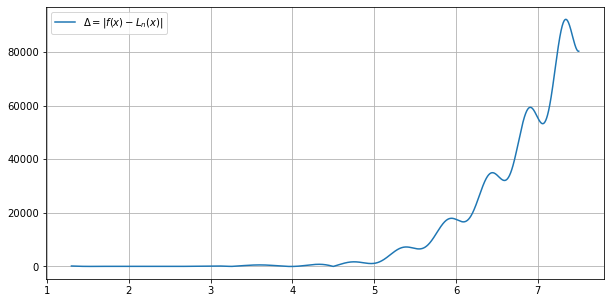

In [13]:
x_data = np.linspace(a, b, 10000, dtype = float)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(x_data, LagrangeError(x_data, x, y), label = '$ \Delta = |f(x) - L_n(x)| $')
axs.grid()
axs.legend()

Имеем слишком большую погрешность начиная с $ x > 5 $. Максимальная величина погрешность больше 80000. Это связано с тем, что точки были выбраны на отрезке $ [1.5, 4.5] $. А отрезок на котором мы интерполируем функцию более большой, чем на котором были заданы точки. Поэтому необходимо добавить точки распределенные равномерно по всему отрезку. Сделаем это

In [14]:
# Равномерно выбранные точки на отрезке
x = np.array([
    1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5, 4.7, 4.9,
    5.1, 5.3, 5.5, 5.7, 5.9, 6.1, 6.3, 6.5, 6.7, 6.9, 7.1, 7.3, 7.4, 7.5
])

y = np.array([
    f(1.3), f(1.5), f(1.7), f(1.9), f(2.1), f(2.3), f(2.5), 
    f(2.7), f(2.9), f(3.1), f(3.3), f(3.5), f(3.7), f(3.9), 
    f(4.1), f(4.3), f(4.5), f(4.7), f(4.9), f(5.1), f(5.3), 
    f(5.5), f(5.7), f(5.9), f(6.1), f(6.3), f(6.5), f(6.7), 
    f(6.9), f(7.1), f(7.3), f(7.4), f(7.5)
])

Построим новый график погрешшностей

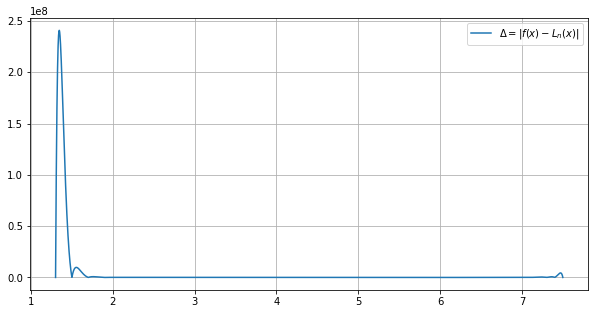

In [15]:
x_data = np.linspace(a, b, 10000, dtype = float)
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(x_data, LagrangeError(x_data, x, y), label = '$ \Delta = |f(x) - L_n(x)| $')
axs.grid()
axs.legend()

Мы смогли получить предъявляемую погрешность интерполяции

**Вывод:** грамотный выбор точек влияет на величину погрешности интерполяции, кроме того увеличение числа точек также ее уменьшает

## Сплайн с отсутствием узла

Теперь приблизим функцию сплайном с отсутсвием узла

Напишем необходимую теорию для реализации метода

**Сплайн определение:** Пусть отрезок $ [a, b] $ разбит точками $ a = x_0 < x_1 < \dots < x_n = b $ на $ n $
частичных отрезков $ [x_{i - 1}, x_i] $. Сплайном степени $ m $ называется функция $ S_m(x) $, обладающая свойствами:

- Функция $ S_m(x) $ непрерывна на отрезке $ [a, b] $ вместе со всеми производными $ S^{(1)}_m{x}, S^{(2)}_m{x}, 
 \dots S^{(p)}_m{x} $ до некоторого порядка $ p $
 
- на каждом частичном отрезке $ [x_{i}, x_{i+1}] $ фунция $ S_m(x) $ совпадает с некоторым алгебраическим многочленом
 степени $ m $ $ P_{m, i}(x) $
  
  
**Дефект сплайна:** разность между степенью сплайна и наивысшим порядком непрерывной на $ [a, b] $ производной 
функции $ S_m(x) $ $ m - p $

На практике чаще всего применяют кубические сплайны

**Интерполяционный сплайн:** Сплайн $ S_m(x) $ называется интерполяционным, если $ S_m(x_i) = y_i $ $ \forall i = 0, \dots ,n $

**Наклон сплайна:** Значение $ s_i = S^{\prime}_m(x_i)$ называется наклоном сплайна в точке $ x_i $

Заметим, что на отрезке $ [x_{i - 1}, x_i] $ интерполяционный кубический сплайн определяется заданием значений 
$ y_{i - 1}, y_i, s_{i - 1}, s_i $

Напишем данную формулу

$$  P_{3, i}(x) = y_{i - 1} \frac{\left(x - x_i \right)^2 \left(2(x - x_{i - 1}) + h_i \right)}{h^3_i}
 + y_i \frac{\left(x - x_{i - 1} \right)^2 \left(2(x_i - x) + h_i \right)}{h^3_i}  + 
    s_{i - 1} \frac{\left(x - x_{i-1} \right) \left(x - x_i \right)^2}{h^2_i} + 
    s_{i} \frac{\left(x - x_{i-1} \right)^2 \left(x - x_i \right)}{h^2_i}$$

где $ h_i = x_i - x_{i - 1} $

Таким образом надо выбрать наклоны $ s_i $

Согласно общей теории мы можем прийти к следующей системе уравнений относительно $ s_i $

$$ h_i^{-1} s_{i - 1} + 2 \left(h_i^{-1} + h_{i + 1}^{-1} \right) s_i + h_{i + 1}^{-1} s_{i + 1} = 3 \left( h_i^{-2} (y_i - y_{i - 1}) +  h_{i+1}^{-2} (y_{i + 1} - y_{i}) \right) $$ 

$ i = 1, 2, \dots, n - 1$

Эта система уравнений недоопределена. Так как число неизвестных $ n + 1$, а число уравнений $ n - 1 $

Как раз один способов доопределения системы называется сплайном с отсутствием узла

Записываем следующие два уравнения

$$ h^{-2}_1 s_0  + ( h^{-2}_1 -  h^{-2}_2)s_1 - h^{-2}_2 s_2 = 2h_2^{-3}(y_1 - y_2) - 2h_1^{-3}(y_0 - y_1) $$

$$ h^{-2}_{n - 1} s_{n - 2}  + ( h^{-2}_{n - 1} -  h^{-2}_n)s_{n - 1} - h^{-2}_n s_n = 2h_n^{-3}(y_{n - 1} - y_n) - 2h_{n - 1}^{-3}(y_{n - 2} - y_{n - 1}) $$

Теперь имеем нужное число уравнений $ n + 1 $

Напишем код метода

Систему будем решать методом Гаусса

In [45]:
def makeVectorH(x, n):
    h = np.ones(n)
    for i in range(1, n):
        h[i] = x[i] - x[i - 1]
    return h


def makeSplineMatrix(h, n):
    S = np.ones((n, n))
    for i in range(1, n - 1):
        S[i - 1][i - 1] = h[i]**(-1)
        S[i - 1][i] = 2 * (h[i]**(-1) + h[i + 1]**(-1)) 
        S[i - 1][i + 1] = h[i + 1]**(-1)
    S[n - 2][0] = h[1]**(-2)
    S[n - 2][1] = h[1]**(-2) - h[2]**(-2)
    S[n - 2][2] = -h[2]**(-2)
    S[n - 1][n - 3] = h[n - 2]**(-2)
    S[n - 1][n - 2] = h[n - 2]**(-2) - h[n - 1]**(-2)
    S[n - 1][n - 1] = -h[n - 1]**(-2)
    return S

def makeSplineVector(y, h, n):
    v = np.ones(n)
    for i in range(1, n - 1):
        v[i - 1] = 3 * (h[i]**(-2) * (y[i] - y[i - 1]) + h[i + 1]**(-2)*(y[i + 1] - y[i]))
    v[n - 2] = 2 * h[2]**(-3) * (y[1] - y[2]) - 2 * h[1]**(-3)*(y[0] - y[1])
    v[n - 1] =  2 * h[n - 1]**(-3) * (y[n - 2] - y[n - 1]) - 2 * h[n - 2]**(-3)*(y[n - 3] - y[n - 2])
    return v

def calculateSpline(t, x, y):
    n = x.shape[0]
    h = makeVectorH(x, n)
    A = makeSplineMatrix(h, n)
    b = makeSplineVector(y, h, n)
    s = MethodGauss(A, b)
    i = 0
    for j in range(1, n):
        if t >= x[j - 1] and t <= x[j]:
            i = j
            break
    return y[i - 1] * ((t - x[i])**2 * (2 * (t - x[i - 1]) + h[i]))/(h[i]**3) + y[i] * ((t - x[i - 1])**2 * (2 * (x[i] - t) + h[i]))/(h[i]**3) + s[i - 1] * ((t - x[i - 1]) * (t - x[i])**2)/(h[i]**2) + s[i] * ((t - x[i - 1])**2 * (t - x[i])) / (h[i]**2)

Теперь напишем необходимые точки

In [49]:
n = 18
x = np.ones(n)
y = np.ones(n)
step = (b - a) / n 
start = a
for i in range(n):
    x[i] = start
    y[i] = f(x[i])
    start += step

Построим график погрешности метода

In [50]:
# Абсолютная погрешность метода
def splineError(t, x, y):
    return abs(f(t) - calculateSpline(t, x, y))

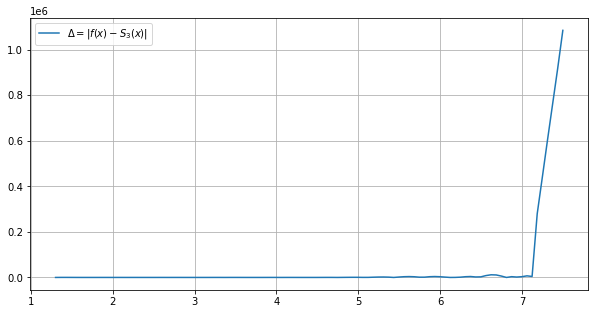

In [51]:
x_data = np.linspace(a, b, 100)
f_main = f(x_data)
f_spline = [calculateSpline(i, x, y) for i in x_data]
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(x_data,  np.abs(f_main - f_spline), label = '$ \Delta = |f(x) - S_3(x)| $')
axs.grid()
axs.legend()

По графику вино, что погрещность почти близка к нулю. Следующим шагом построим на одном графике, график исходной функции,
сплайна с отсутствием узлов, многочлена Лагранжа

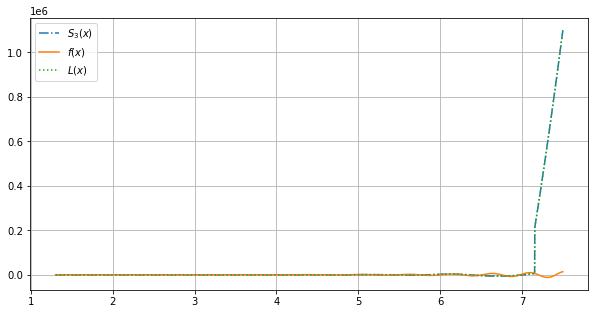

In [53]:
x_data = np.linspace(a, b, 100)
f_main = f(x_data)
f_lagrange = [calculateSpline(i, x, y) for i in x_data]
f_spline = [calculateSpline(i, x, y) for i in x_data]
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.plot(x_data, f_spline, label = '$ S_3(x) $', ls = 'dashdot')
axs.plot(x_data, f_main, label = '$f(x)$')
axs.plot(x_data, f_lagrange, label = '$L(x)$', ls = 'dotted')
axs.grid()
axs.legend()

**Вывод** При правильном подборе точек, можно достаточно точно проинтерполировать функцию, как видно на данном примере, значения сплайна и интерполирующего многочлена почти впритык совпадают со значениями функции

## Задание 4.3

Задана функция $f(x)$, определенная на отрезке $[-1;1]$. Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью  $\varepsilon$ и произвести экономизацию полученного степенного ряда

Заданная функция $ f(x) = 3 x e^{x} $

Заданная точность $ \varepsilon = 10^{-8} $

Запишем для данной функций ряд Тейлора $ f(x) = 3 x e^x = \sum\limits_{n=0}^\infty{\frac{3 x^{n + 1}}{n!}} $


Теперь запишем это в программе

In [37]:
# i-ый коэффициент ряда Тейлора
def coefTaylor(x, i):
    return (3 * x**(i + 1)) / (math.factorial(i)) 

# Частичная сумма ряда Тейлора до n
def partialSum(x, n):
    sum = x * 0
    for i in range(n + 1):
        sum += coefTaylor(x, i)
    return sum

# Сама заданная функция
def f(x):
    return 3 * x * np.exp(x)

Найдем сколько членов рядов Тейлора следует взять для достижения заданной точности на отрезке

In [38]:
a = -1
b = 1
x_data = np.linspace(a, b, 10000)
eps = 10**(-8)
n = 0
while np.amax(abs(partialSum(x_data, n) - f(x_data))) > eps:
    n += 1

print("n = ", n)

n =  11


Получили что необходимо взять 12 членов для достижения поставленной точности. Теперь построим график данного ряда

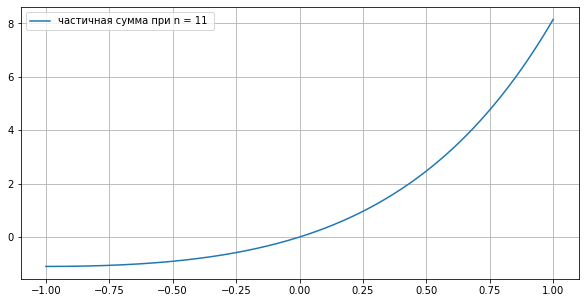

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(x_data, partialSum(x_data, n), label = 'частичная сумма при n = 11 ')
axs.grid()
axs.legend()

Приступим к экономизции ряда. Для этого нам понадобятся многочлены Чебышева. Они определяются с помощью рекуррентного соотношения $ T_0(x) = 1, T_1(x) = x, T_{n + 1} = 2 x T_{n}(x) - T_{n - 1}(x) $

Есть следующие формулы для экономизации степенного ряда $ x = T_1, x^2 = \frac{1}{2} (1 + T_2), x^3 = \frac{1}{4} (3x + T_3),
x^4 = \frac{1}{8} (8 x^2 - 1 + T_4)$ и т.д.

Идея экономизации состоит в следующем мы постепенно заменяем $ x^n, x^{n -1}, x ^{n - 2} $ и т.д. Формулами через многочлены Чебышева и отбрасываем затем многочлен Чебышева из этого ряда. Проделываем мы этот процесс до тех пока можем сохранить необходимую точность

Определим формулу для вычисления многочлена Чебышева

In [40]:
# многочлен Чебышева
def polynomChebyshev(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2 * x * polynomChebyshev(x, n - 1) - polynomChebyshev(x, n - 2)

Пробуем избавится от $ x^{12} $

Для него справедлива следующая формула через многочлены Чебышева

$$ x^{12} = \frac{1}{2048} \left(6144 x^{10} - 6912 x^{8} + 3584 x^{6} - 840 x^{4} + 72  x^{2} - 1 + T_{12} \right) $$

In [57]:
# Формула x**12 через многочлен Чебышева
def x12(x):
    return (1 / 2048) * (6144 * x**10 - 6912 * x**8 + 3584 * x**6 - 840 * x**4 + 72 * x**2 - 1)

# Получаемая максимальная погрешность
delta = np.amax(abs(partialSum(x_data, 10) + 3 / math.factorial(11) * x12(x_data) - f(x_data)))

if delta <= eps:
    print("Точность пока сохраняется")
else:
    print("Точность перестала сохраняется")
print("delta = ", delta)

Точность пока сохраняется
delta =  6.818353881499206e-09


Избавление от $ x^{11} $ сохраняет точность
Следующий шаг. Пробуем избавится от $ x^{11} $

Для него справедлива формула

$ x^{11} = \frac{1}{1024} \left(2816 x^9 - 2816 x^7 + 1232 x^5 - 220 x^3 + 11x + T_{11}  \right) $

In [60]:
# Формула x**11 через многочлен Чебышева
def x11(x):
    return 1 / 1024 * (2816 * x**9 - 2816*x**7 + 1232*x**5 - 220*x**3 + 11 * x)

# Получаемая максимальная погрешность
delta = np.amax(abs(partialSum(x_data, 9) + 3 / math.factorial(10) * x11(x_data) - f(x_data)))
if delta <= eps:
    print("Точность пока сохраняется")
else:
    print("Точность перестала сохраняется")
print("delta = ", delta)

Точность перестала сохраняется
delta =  8.274532525831546e-08


После отбрасывания $ x^{11} $ точность перестала сохранятся. Следовательно нет смысла дальше продолжать процесс экономизации 
ряда.

Следующим шагом построим погрешнось каждого из этапов экономизации

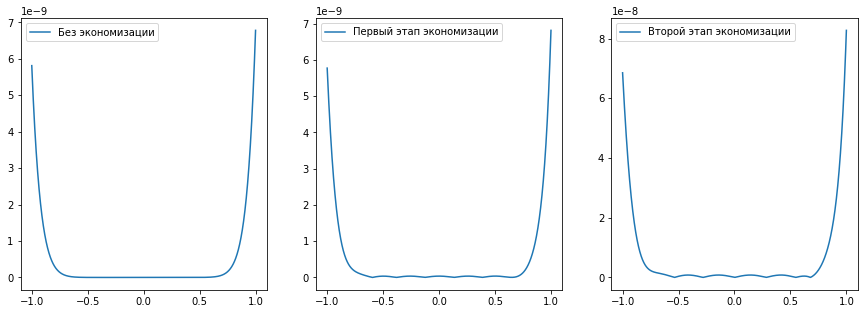

In [64]:
# Погрешность без экономизации
def absErrorWithoutEco(x_data):
    return abs(f(x_data) - partialSum(x_data, 11))

# Погрешность на первом этапе экономизации
def absErrorFirstStepEco(x_data):
    return abs(partialSum(x_data, 10) + 3 / math.factorial(11) * x12(x_data) - f(x_data))
    
# Погрешность на втором этапе экономизации
def absErrorSecondStepEco(x_data):
    return abs(partialSum(x_data, 9) + 3 / math.factorial(10) * x11(x_data) - f(x_data))
    
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(x_data, absErrorWithoutEco(x_data), label = 'Без экономизации')
axs[0].legend()
axs[1].plot(x_data, absErrorFirstStepEco(x_data), label = 'Первый этап экономизации')
axs[1].legend()
axs[2].plot(x_data, absErrorSecondStepEco(x_data), label = 'Второй этап экономизации')
axs[2].legend()